# **Amostragem e Estatística Inferencial**

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("Set1", 8, .75)

## **TOC:**
Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) [Introdução](#intro)
- 2) [Amostragem](#amostragem)
    - 2.1) [Tipos de Amostragem](#tipos_amostragem) 
    - 2.2) [Amostra Aleatória Simples](#aleatoria_simples)
    - 2.3) [Amostra Estratificada](#estratificada)
    - 2.4) [Tamanho Amostral](#tamanho_amostral)
- 3) [Teorema central do limite](#TLC)
    - 3.1) [Intervalos de confiança](#intervalo_confianca)
    - 3.2) [p-value](#p_value)
- 4) [Testes de Hipótese](#hyphotesis_test)
    - 4.1) [Tipos de erros](#error_type)
- 5) [Correlação](#corr)
    - 5.1) [Coeficiente de correlação de Pearson](#pearson)
    - 5.2) [Coeficiente de correlação de Spearman](#spearman)

___

## 1) **Introdução** <a class="anchor" id="intro"></a>

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. 

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.

A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.


<center><img src="figures/pop_amostral.png" align="center" width=450/></center>

#### **Definições**

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da populaçao;

**Amostra**: uma parte ou subconjunto da população;

**Censo**: observação de todos os elementos da população;

**Parâmetro Populacional**:  Pode ser qualitativa (gosto musical, opnião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais: 
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    
- Exemplos de estimadores de ponto: 
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$


___

## 2) **Amostragem** <a class="anchor" id="amostragem"></a>

Veremos agora os principais conceitos e métodos da primeira etapa de todo estudo estatístico: a amostragem

_____________

### 2.1) **Tipos de Amostragem** <a class="anchor" id="tipos_amostragem"></a>

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetico de obter uma **amostra representativa**. 

Uma amostra é considerada representativa quando consegue **refletir as caracteristicas da população**.

Vamos ver os principais **métodos de amostragem**:

____


### 2.2) **Amostra Aleatória Simples** <a class="anchor" id="aleatoria_simples"></a>

Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com preposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**.

In [2]:
import random

pop = list(range(20))
print("População: ", pop, "\n")

amostra = random.sample(pop, 5)
print("Amostra: ", amostra)

População:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

Amostra:  [5, 7, 18, 17, 13]


____

### 2.3) **Amostra Estratificada** <a class="anchor" id="estratificada"></a>

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. 

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc. 

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas. 

Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). 

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.


<center><img src="figures/amostragem_estratificada.png" align="center" width=450/></center>

In [3]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25*tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5*tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25*tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


____

### 2.4) **Tamanho Amostral** <a class="anchor" id="tamanho_amostral"></a>

Ao extrair uma amostra para inferir algo sobre a população, sempre há um erro associado ao **planejamento amostral**. 

A medida que o **tamanho da amostra aumenta**, o **erro do estimador diminui** (vide o TLC!). 

Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. 

Deste modo, o ponto chave de um levantamento amostral é determinar **o tamanho adequado da amostra** para que **os estimadores pontuais** sejam **estimados com confiança**!

Ou seja, queremos responder à pergunta:

> O quão confiantes estamos com relação aos estimadores pontuais que calcularmos com base em uma amostra?

Ou seja,

- A partir de $\bar{x}$, o que eu posso **inferir** sobre $\mu$?

Para responder a estas perguntas, vamos introduzir uma das ideias mais poderosas da estatística: o **teorema central do limite**

____

## 3) **Teorema do Limite Central (TLC, ou TCL)** <a class="anchor" id="TLC"></a>

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande ($n>30$), a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral $n>30$.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

Vamos ver alguns exemplos:

____

__População: Distribuição Uniforme__

A **função densidade de probabilidade** da [distribuição uniforme](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\frac{1}{b-a} \ ,  & a \leq x \leq b\\ 
0 \ , & x\leq a \ \text{ou} \  x \geq b
\end{matrix}\right.$$

Com:

$$ \mu = \frac{1}{2}(a + b) $$

$$ \sigma = \frac{1}{\sqrt{12}}(b-a) $$

Média da distribuição populacional: 5.0
Desvio padrão da distribuição populacional: 2.886751345948129


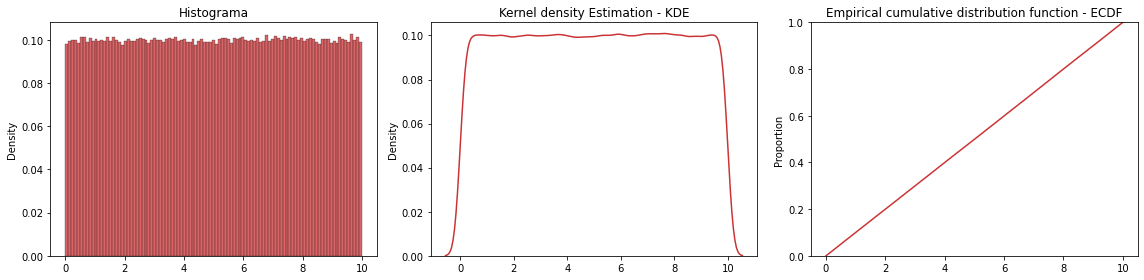

In [4]:
fig, axs = plt.subplots(1,3,figsize=(16,4))

a = 0
b = 10
u = (1/2)*(a+b)
sigma = (1/np.sqrt(12))*(b-a)

tamanho_pop = 1_000_000

print("Média da distribuição populacional:", u)
print("Desvio padrão da distribuição populacional:", sigma)

x = np.random.uniform(a, b, size=tamanho_pop)

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
plot_distribution(sns.histplot, x, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, x, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, x, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

In [5]:
def tlc(x:np.array, qtd_amostras:int, tamanho_amostral:int):

    amostras = []
    for _ in range(qtd_amostras):
        amostra_x = np.random.choice(x, tamanho_amostral)
        amostras.append(np.mean(amostra_x))
    amostras = np.array(amostras)
    return np.array(amostras)

qtd_amostras = 10000
tamanho_amostral = 100

amostras = tlc(x, qtd_amostras, tamanho_amostral)

Média da distribuição de médias amostrais: 5.005


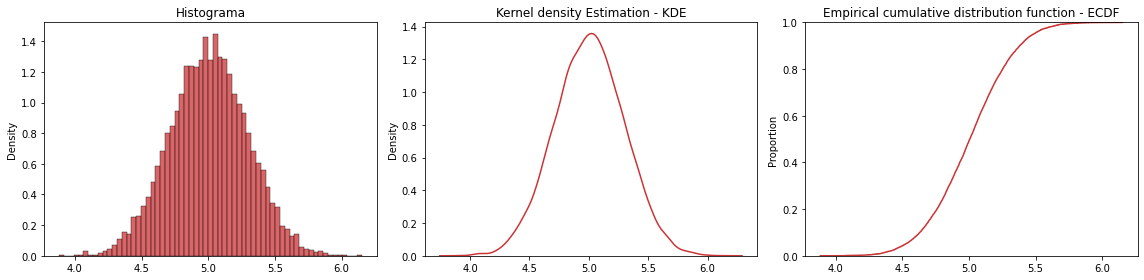

In [6]:
fig, axs = plt.subplots(1,3,figsize=(16,4))

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
mean = amostras.mean()
print(f"Média da distribuição de médias amostrais: {round(mean,4)}")

plot_distribution(sns.histplot, amostras, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, amostras, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, amostras, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

____

__População: Distribuição Gamma__

A **função densidade de probabilidade** da [distribuição gamma](https://en.wikipedia.org/wiki/Gamma_distribution) é dada por:

$$ f(x) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

Com:

$$ \mu = \frac{\alpha}{\beta} $$

$$ \sigma = \frac{\sqrt{\alpha}}{\beta} $$

Média: 4.0
Desvio padrão da distribuição populacional: 2.8284271247461903


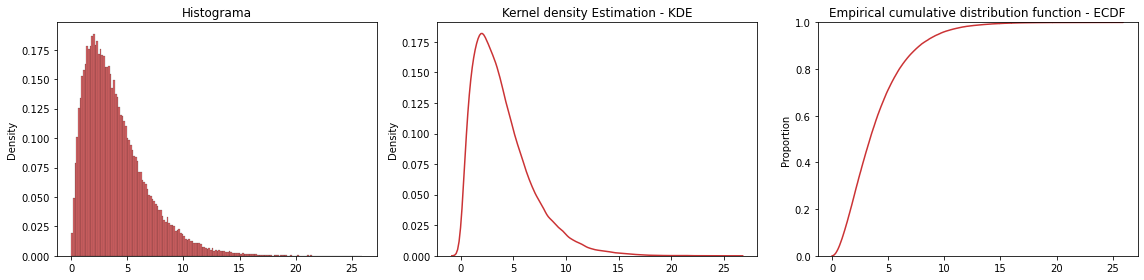

In [7]:
fig, axs = plt.subplots(1,3,figsize=(16,4))

alpha = 2
beta = 1/2
n_samples = 100_000
print(f"Média: {alpha/beta}")
print(f"Desvio padrão da distribuição populacional: {np.sqrt(alpha)/beta}")

x=np.random.gamma(shape=alpha, scale=1/beta, size=n_samples)

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
plot_distribution(sns.histplot, x, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, x, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, x, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

Média: 4.00545134433927


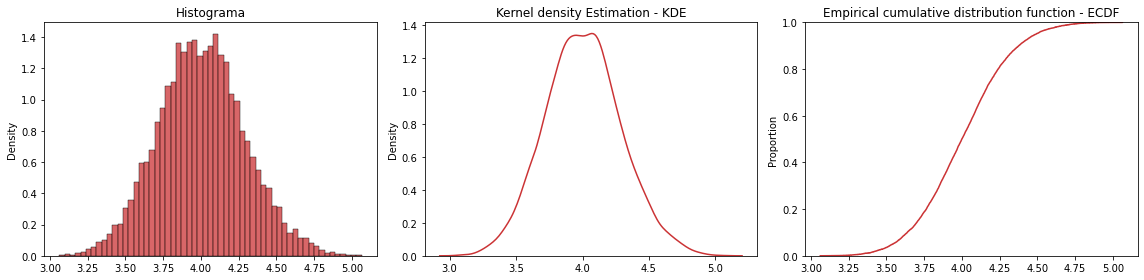

In [8]:
qtd_amostras = 10000
tamanho_amostral = 100

amostras = tlc(x, qtd_amostras, tamanho_amostral)

fig, axs = plt.subplots(1,3,figsize=(16,4))

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
print(f"Média: {np.mean(amostras)}")
plot_distribution(sns.histplot, amostras, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, amostras, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, amostras, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

____

__População: Distribuição exponencial__

A **função densidade de probabilidade** da [distribuição exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\frac{1}{\beta} e^{-\frac{x}{\beta}} \ ,  & x \geq 0\\ 
0 \ , & x <0
\end{matrix}\right.$$

Com:

$$ \mu = \beta $$

$$ \sigma = \beta  $$

Média: 0.5
Desvio padrão da distribuição populacional: 0.5


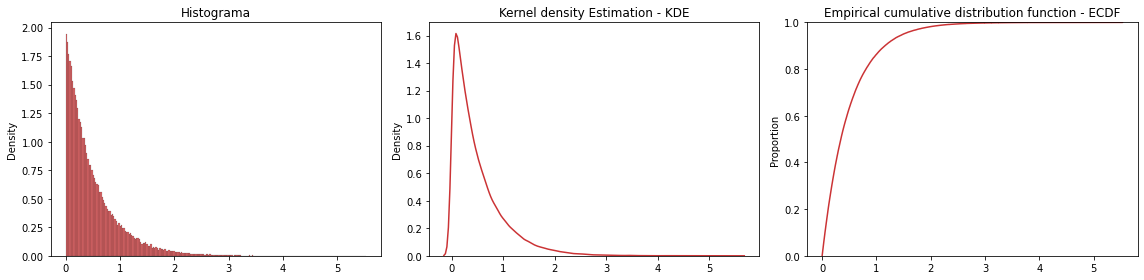

In [9]:
fig, axs = plt.subplots(1,3,figsize=(16,4))

beta = 1/2
n_samples = 100_000
print(f"Média: {beta}")
print(f"Desvio padrão da distribuição populacional: {beta}")
x= np.random.exponential(scale=beta, size=n_samples)

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
plot_distribution(sns.histplot, x, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, x, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, x, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

Média: 0.4988050545369819


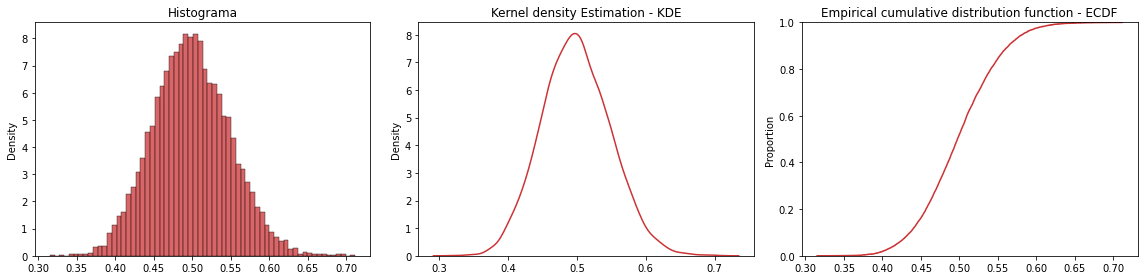

In [10]:
qtd_amostras = 10000
tamanho_amostral = 100

amostras = tlc(x, qtd_amostras, tamanho_amostral)

fig, axs = plt.subplots(1,3,figsize=(16,4))

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
print(f"Média: {np.mean(amostras)}")
plot_distribution(sns.histplot, amostras, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, amostras, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, amostras, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

_____

Vimos acima o TLC em ação, o que é bem legal.

Mas na prática, não é muito conveniente fazermos diversas amostras para termos uma distribuição amostral!

Na realidade, muitas vez temos recursos para fazer **apenas uma amostra**.

A boa notícia é que **se estivermos nas condições de aplicação do TLC**, isso é tudo que basta: **UMA AMOSTRA!**

Com uma única amostra, é possível calcularmos **nossos estimadores pontuais**, e, além disso (e mais importante): estimar uma **margem de erro** que nos dê, com certo grau de confiança, um intervalo de valores possíveis para o parâmetro populacional!

Vamos entender isso melhor...

_____

### 3.1) **Intervalos de confiança** <a class="anchor" id="intervalo_confianca"></a>

Quando calculamos um **estimador pontual** com base nos dados de uma amostra, esse valor do estimador é a **melhor (e única!) estimativa que temos para o parâmetro populacional**.

Mas, como este estimador foi calculado com base em um pedaço reduzido da população, é natural **haja uma diferença com relação ao parâmetro pessoal**.

> Por isso, é importante que tenhamos um **intervalo de valores possíveis** para a estimativa do parâmetro populacioonal ao invés do estimador pontual (daí o nome "pontual", aliás)

Especificar apenas o parâmetro populacional é como **pescar com uma lança**: é uma técnica precisa, mas tem alta chance de errar.

Se queremos ter mais chances de caputrar o peixe, seria melhor **usar uma rede**: menos precisa, mas mais segura.

O equivalente de "pescar com uma rede" é especificar um **intervalo de confiança**, ou seja, um **intervalo de valores para o parâmetro populacional**, com certo grau de confiança, ao invés de apresentarmos um único valor.

Como o estimador pontual é nosso melhor palpite para o parâmetro populacional, faz sentido que ele seja o centro do intervalo de confiança. Mas como definir os limites do intervalo?

<center><img src="figures/interval_se.png" align="center" width=450/></center>


Para definir a **largura do intervalo de confiança**, utilizamos **o erro padrão**!

> Sabemos que, **dentro das hipóteses do TLC**,
- A **média da distribuição amostral será o parâmetro de interesse** ($\mu_{\bar{x}} = \mu$);
- O erro padrão representa o **desvio padrão** do estimador pontual;
- A distribuição amostral do estimador será **aproximadamente normal**

Sabendo tudo isso, e sabendo que 95% dos dados estão centrados entre 1.96 desvios-padrão da dsitribuição normal,

<center><img src="figures/se_error.png" align="center" width=350/></center>


> **Podemos construir um intervalo de confiança que se estende 1.96 erros padrões (SEs) do estimador pontual para estarmos 95% confiantes de que o intervalo captura o parâmetro populacional!**

Isso significa que se fizéssemos **muitas amostras**, aproximadamente 95% dos intervalos de confiança construídos **conteriam o parâmetro populacional!**


<center><img src="figures/example_tlc.png" align="center" width=350/></center>


Assim,

> **Se a distribuição amostral de um estimador pontual $EP$ se enquadra nas condições do TLC, o intervalo de confiança de 95% é dado por $$\boxed{EP \pm 1.96 \  SE_{EP}}$$**

Ou seja, para o caso da **média**, temos $\bar{x} \pm 1.96 \ \frac{\sigma}{\sqrt{n}}$


Para diferentes graus de confiança, usamos diferentes multiplicadores


<center><img src="figures/confidance_interval_threshold.png" align="center" width=350/></center>


> **IC de 90%: $\boxed{EP \pm 1.645 \  SE_{EP}}$**

> **IC de 99%: $\boxed{EP \pm 2.576 \  SE_{EP}}$**

Naturalmente, quanto **mais largo o IC**, mais **confiança você tem que o parâmetro populacional é capturado dentro do intervalo**: quanto maior a rede, mais chance vc tem de pegar o peixe!

### Agora deu pra perceber a importância de uma amostra grande?

Note as equações para o SE da média e da proporção:


Não somente um $n$ grande nos perimite usar o TLC (**e isso é um elemento fundamental de tudo o que fizemos!!**), como os SE são **inversamente proporcionais** a $\sqrt{n}$, de modo que $$\uparrow n  \ \ \Leftrightarrow  \ \downarrow SE \ \ \ \Leftrightarrow \  \downarrow IC$$

E, claro, quão menor é o IC, mais precisa é nossa estimativa para o parâmetro populacional!

Vamos agora a alguns exemplos!

_____

**Exemplo 2**: Vamos pegar a base de pesos e alturas:

In [11]:
df_wh = pd.read_csv('data/weight-height.csv')

df_wh["Height"] = df_wh["Height"] * 2.54
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh.sample(3)

,Gender,Height,Weight
1725,Male,172.799178,80.134878
4098,Male,167.574328,80.588005
3944,Male,170.257254,83.121480


In [12]:
# qual é a média de alturas e pesos dentre os diferentes sexos?

df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean"])

,Height,Weight
,mean,mean
Gender,,
Female,161.820285,61.625734
Male,175.326919,84.831997


é justo modelar as médias amostrais acima como normalmente distribuídas?

R - sim, pois n>30, e vamos assumir amostra aleatória

In [13]:
# calcule o SE das amostras de altura e peso de cada sexo

def SE(x):
    return x.std()/np.sqrt(len(x))

df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean", SE])

Height               Weight          
              mean        SE       mean        SE
Gender                                           
Female  161.820285  0.096853  61.625734  0.122026
Male    175.326919  0.102855  84.831997  0.126893

Calcule agora o intervalo de confiança de 99% para as médias populacionais de altura e peso entre os sexos


In [14]:
def SE(x):
    return x.std()/np.sqrt(len(x))

def IC_95(x):
    
    ic_min = round(x.mean() - 1.96*SE(x), 2)
    
    ic_max = round(x.mean() + 1.96*SE(x), 2)
    
    return (ic_min, ic_max)

stats = df_wh.groupby("Gender")[["Height", "Weight"]].agg(["mean", SE, IC_95])
stats

Height                                 Weight            \
              mean        SE             IC_95       mean        SE   
Gender                                                                
Female  161.820285  0.096853  (161.63, 162.01)  61.625734  0.122026   
Male    175.326919  0.102855  (175.13, 175.53)  84.831997  0.126893   

                        
                 IC_95  
Gender                  
Female  (61.39, 61.86)  
Male    (84.58, 85.08)

como interpretar este resultado?

estamos 95% confiantes que a média de altura das mulheres está entre 1.61m e 1.62m

In [15]:
mean, SE, (xmin, xmax) = stats["Height"].loc["Female"]

xmin = xmin-0.25
xmax = xmax+0.25

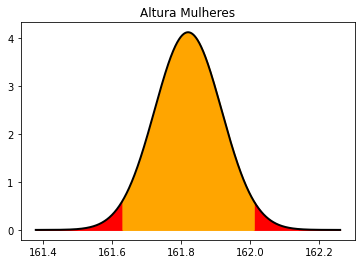

In [16]:
# range total da distribuição
threshold = 1.96

upper_interval = mean+threshold*SE
lower_interval = mean-threshold*SE

x = np.linspace(xmin, xmax, 1000)
y = scipy.stats.norm(mean, SE).pdf(x)
plt.plot(x,y,'k', lw=2)
x = np.linspace(xmin, lower_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')

x = np.linspace(xmax, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')


x = np.linspace(lower_interval, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='orange')
plt.title("Altura Mulheres")
plt.show()

**Laranja:** Existe uma probabilidade de 95% de que cada vez que eu medir alguém sua altura vai estar entre [161.63, 162.01]cm.

**Vermelho:** Existe 2.5% de chance de cada vez que medirmos uma mulher termos uma altura menor que 161.63cm. Existe 2.5% de chance de cada vez que medirmos uma mulher termos uma altura maior que 162.01cm. 

Se nós medissimos uma mulher com altura 160, nós podemos dizer que essa mulher veio da mesma distribuição ($N \left(\mu_{\overline{x}}, \frac{\sigma_{\overline{x}}}{\sqrt{n}}\right)$) que estamos analisando? 

- $H_0$: Eles vem da mesma distribuição.
- $H_1$: Eles <font color="orange"><b>NÃO</b></font> vem da mesma distribuição.

# 3.2) **p-value**  <a class="anchor" id="p_value"></a> 


O ```p-value``` é a soma das probabilidades dos eventos que possuem probabilidade igual ou menor de acontecer.

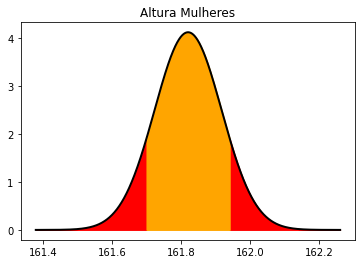

In [17]:
threshold = 1.96

measure = 161.7
lower_interval = measure
upper_interval = 2*abs(measure - mean) + measure

x = np.linspace(xmin, xmax, 1000)
y = scipy.stats.norm(mean, SE).pdf(x)
plt.plot(x,y,'k', lw=2)
x = np.linspace(xmin, lower_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')

x = np.linspace(xmax, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')


x = np.linspace(lower_interval, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='orange')
plt.title("Altura Mulheres")
plt.show()

In [18]:
# Supondo 0.02 para cada lado
p = 0 + 0.1 + 0.1
p

0.2

Qual a probabilidade de medirmos uma mulher entre 161.81cm e 161.83cm?

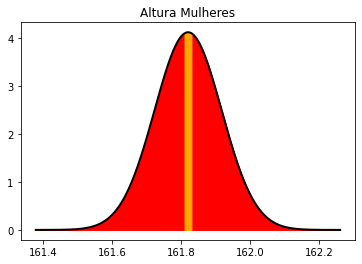

In [19]:
threshold = 1.96

lower_interval = 161.81
upper_interval = 161.83

x = np.linspace(xmin, xmax, 1000)
y = scipy.stats.norm(mean, SE).pdf(x)
plt.plot(x,y,'k', lw=2)
x = np.linspace(xmin, lower_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')

x = np.linspace(xmax, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='r')


x = np.linspace(lower_interval, upper_interval, 1000)
y=scipy.stats.norm(mean, SE).pdf(x)
plt.fill_between(x, y,color='orange')
plt.title("Altura Mulheres")
plt.show()

___

## 4) **Testes de Hipóteses** <a class="anchor" id="hyphotesis_test"></a> 

- Kolmogorov–Smirnov test:
    
    - $H_0$: Os dados seguem a mesma distribuição.
    - $H_1$: Os dados <font color="orange"><b>NÃO</b></font> seguem a mesma distribuição.

In [20]:
from scipy.stats import ks_2samp

x = df_wh.query("Gender == 'Male'").loc[:, "Height"].values

mean, std = x.mean(), x.std() 
y = np.random.normal(loc=mean,scale=std, size=100_000)

ks_2samp(x, y)

KstestResult(statistic=0.01183999999999999, pvalue=0.5128479244231909)

In [21]:
x = np.random.exponential(scale=2, size=100_000)
mean, std = x.mean(), x.std() 
y = np.random.normal(loc=mean,scale=std, size=100_000)
ks_2samp(x, y)

KstestResult(statistic=0.15906, pvalue=0.0)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

**Teste t para Amostras Independentes:**

Premissas:

- Os dados são independentes: o valor de uma observação não influencia ou afeta o valor de outras observações.

- A variável dependente (aquela que estamos usando para calcular a média dos grupos) é distribuída conforme uma distribuição Normal.

- A variável dependente possui homogeneidade de variância dentre os grupos.

Hipóteses:

- $H_0$: $\mu_1 = \mu_2$
- $H_1$: $\mu_1 \neq \mu_2$ 

**Teste de Mann–Whitney**

Hipóteses:

- $H_0$: $mediana_1 = mediana_2$
- $H_1$: $mediana_1 \neq mediana_2$

### **Resumo**

**E como interpretar o p-value?** 

Para isso, usamos um **nível de confiança**, que em geral é tomado como $\alpha = 5\%$.

Assim, 

> Se p-value $< \alpha$: **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

> Se p-value $> \alpha$: **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**.
 
 
Se o p-value for de 1.6%, que é menor que 5%, podemos, com 5% de confiança, **rejeitar** a hipótese nula! Ou seja, **os nossos dados fornecem** evidências suficientemente fortes em favor da alternativa!

_____

## 4.1) **Tipos de erros** <a class="anchor" id="error_type"></a> 

O processo de inferência estatística é o processo de inferir alguma propriedade acerca de uma população de dados a partir de uma amostra desses dados. Nesse processo, existe a ocorrência de um **erro estatístico** que irá depender do tamanho da amostra em relação ao tamanho da população. 

Dessa forma, existem duas decisões possíveis:
1. Rejeita-se $H_0$.
2. Falha-se em rejeitar $H_0$.

Com isso, pode-se acertar de duas formas ou errar de duas formas. 

<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">Decisão correta</td>
        <td style=" border: 1px solid black">Erro do tipo II</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">Erro do tipo I</td>
        <td style=" border: 1px solid black">Decisão correta</td>
    </tr>
</table>

Cada um desses erros, o erro do tipo I ou o do tipo II, poderá ser quantizado através de uma probabilidade de ocorrência; isso é, o erro do tipo I terá uma probabilidade $\alpha$ de ocorrer, e o erro do tipo II terá uma probabilidade $\beta$ de ocorrer.


<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">probabilidade 1-$\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $\beta$</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">probabilidade $\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $1-\beta$</td>
    </tr>
</table>

____

## 5) **Correlação**  <a class="anchor" id="corr"></a> 

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**. 

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

### 5.1) **Coeficiente de correlação de Pearson** <a class="anchor" id="pearson"></a>

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
 **Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [22]:
df_wh = pd.read_csv('data/weight-height.csv')

In [23]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

In [24]:
df_wh.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Note que a mediana e a média são bem próximas... Isso é um indicativo de normalidade!

__Vamos dar uma olhada na distribuição da altura e do peso...__

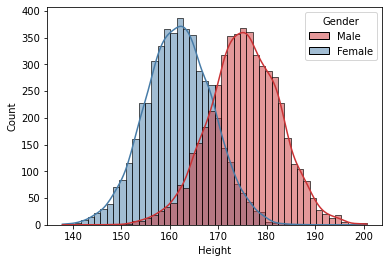

In [25]:
sns.histplot(data=df_wh, x="Height", hue="Gender", kde=True)
plt.show()

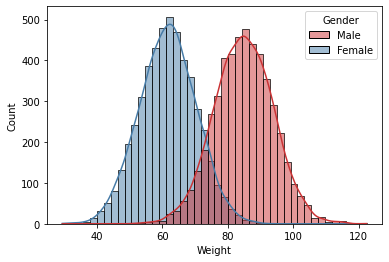

In [26]:
sns.histplot(data=df_wh, x="Weight", hue="Gender", kde=True)
plt.show()

Parece que as variáveis de fato são normalmente distribuídas!

Será que as variáveis estão relacionadas?

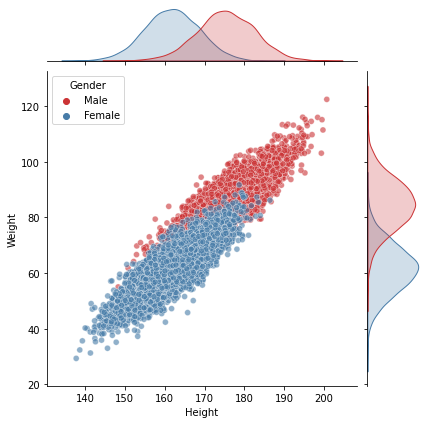

In [27]:
sns.jointplot(data=df_wh, x="Height", y="Weight", hue="Gender", alpha=0.6)
plt.show()

Aperentemente há uma relação **linear** entre as variáveis! 

Vamos dar uma olhada no teste de Pearson:

In [28]:
import scipy

scipy.stats.pearsonr(df_wh["Weight"], df_wh["Height"])

(0.9247562987409149, 0.0)

Separadamente para os sexos:

In [29]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

(0.8629788486163177, 0.0)

In [30]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

(0.8496085914186008, 0.0)

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 5.2) **Coeficiente de correlação de Spearman** <a class="anchor" id="spearman"></a>

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.

 
 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre a svariáveis:

In [31]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

SpearmanrResult(correlation=0.8364885471875417, pvalue=0.0)

In [32]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

SpearmanrResult(correlation=0.8485589833503592, pvalue=0.0)

Vamos analisar outra base?

In [33]:
from sklearn.datasets import load_breast_cancer

In [34]:
bunch = load_breast_cancer(as_frame=True)
data = bunch["data"]
target = bunch["target"]
df_bc = pd.concat([data, target], axis=1)
df_bc.sample(2).columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Vamos dar uma olhada na distribuição das variáveis numéricas!

In [36]:
# for col in df_bc.drop(columns=["target"]).columns:
    
#     plt.title("Distribuição da coluna " + col)
    
#     sns.histplot(data = df_bc, x = col, kde=True, hue="target")

#     plt.show()

Nenhuma tem distribuição normal... Neste caso, temos que usar o teste de correlação de spearman, para pelo menos buscarmos alguma correlação monotônica!

Vamos olhar, por exemplo, para as variáveis "mean radius" e "mean area":


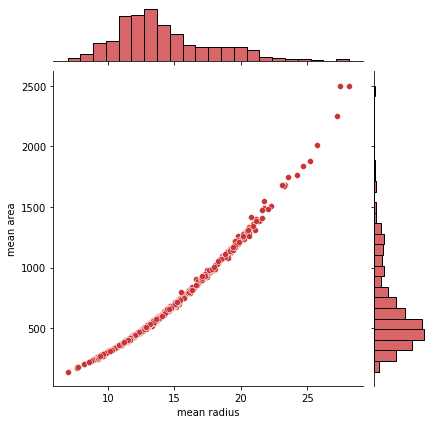

In [37]:
sns.jointplot(data=df_bc, x="mean radius", y="mean area")
plt.show()

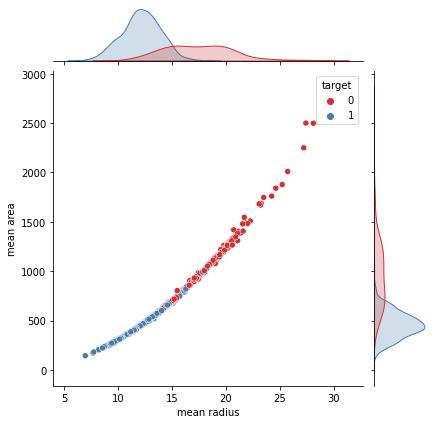

In [38]:
sns.jointplot(data=df_bc, x="mean radius", y="mean area", hue="target")
plt.show()

Claramente parece haver alguma correlação! Vamos ver o que o teste de spearman diz:

In [39]:
scipy.stats.spearmanr(df_bc["mean radius"], df_bc["mean area"])

SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)

Correlação bem próxima de 1, com p-value 0!

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis **são positivamente monotônicamente dependentes!**

Caso queiramos avaliar a correlação de outras variáveis:

In [40]:
df_bc.corr(method="spearman").head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892


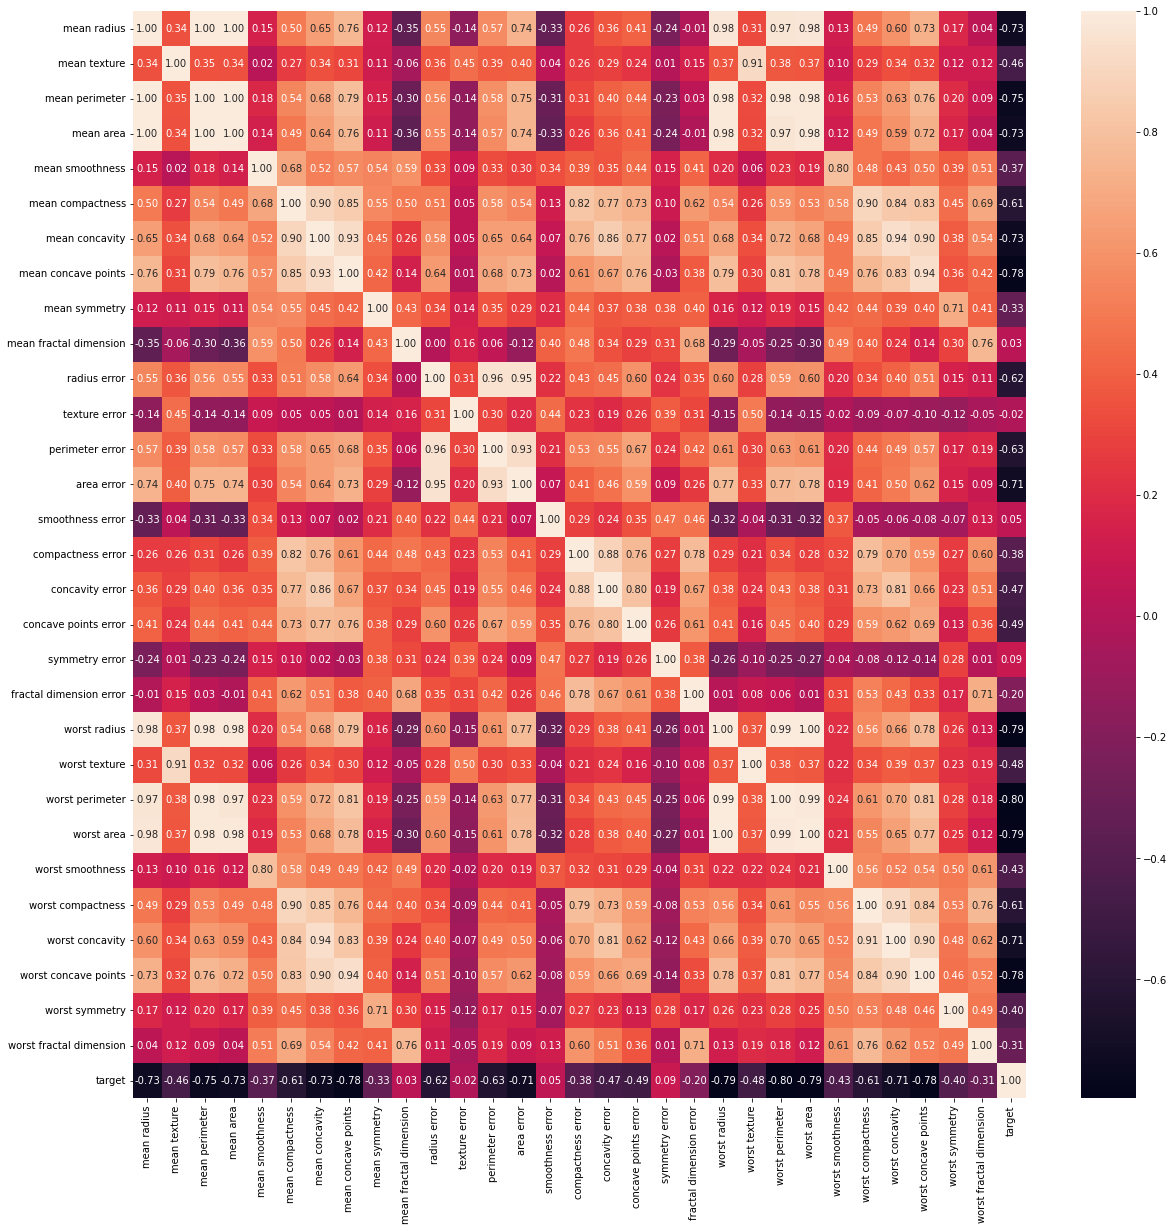

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_bc.corr(method="spearman"), annot=True, fmt=".2f")
plt.show()